In [83]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, GlobalMaxPool1D
from keras.optimizers import Adam
from keras.models import Model

In [56]:
plt.rcParams['figure.figsize'] = [5, 2]

In [23]:
def xor_signs(a, b, c):
  """
  Returns the xor of the signs of three real numbers.

  Args:
    a: A real number.
    b: A real number.
    c: A real number.

  Returns:
    A boolean value indicating whether the signs of a, b, and c are all the same (False) or not (True).
  """

  # Convert the real numbers to their sign bits.
  a_sign = a < 0
  b_sign = b < 0
  c_sign = c < 0

  # Return the xor of the sign bits.
  return a_sign ^ b_sign ^ c_sign


### Visualization

(-3.0, 3.0)

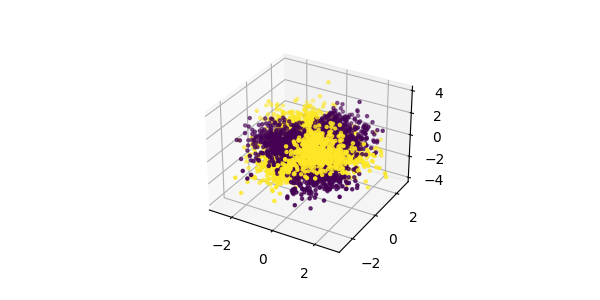

In [42]:
%matplotlib widget
x = np.random.randn(5000)
y = np.random.randn(5000)
z = np.random.randn(5000)
Y = xor_signs(x, y, z)

fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection = '3d')
ax_1.scatter(x, y, z, s = 5, c = Y)
ax_1.set_xlim(-3, 3)
ax_1.set_ylim(-3, 3)

### Building the dataset

In [43]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3) :
    x1 = x[i1]
    x2 = x[i2]
    x3 = x[i3]
    return xor_signs(x1, x2, x3)

for t in range(5000) :
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) #short distance
    Y.append(y)
    
X = np.array(X) # NxT
Y = np.array(Y) # N
N = len(X)
print(X.shape, Y.shape)

(5000, 10) (5000,)


In [61]:
#Linear model
i = Input(shape = (T,))
x = Dense(1, activation = 'sigmoid')(i)
model = Model(i, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(
	loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
	X, Y,
    validation_split=0.5, 
    epochs = 100
)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.7816 - accuracy: 0.4964 - val_loss: 0.7064 - val_accuracy: 0.4848
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5088 - val_loss: 0.6945 - val_accuracy: 0.5084
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5232 - val_loss: 0.6944 - val_accuracy: 0.5172
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5264 - val_loss: 0.6959 - val_accuracy: 0.5124
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5272 - val_loss: 0.6966 - val_accuracy: 0.5204
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5412 - val_loss: 0.6954 - val_accuracy: 0.5140
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5148 - val_loss: 0.6966 - val_accuracy: 0.5100
Epoch 8/100
7

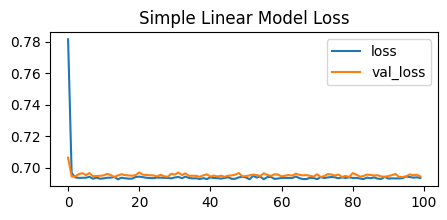

In [63]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Simple Linear Model Loss')
plt.legend()

Text(0.5, 1.0, 'Simple Linear Model Accuracy')

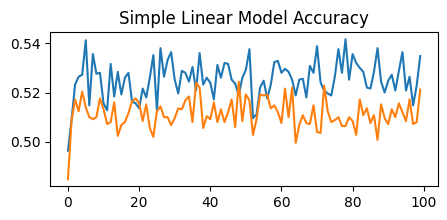

In [64]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('Simple Linear Model Accuracy')

In [65]:
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid') (x)
model = Model(i, x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(
	loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
	X, Y,
    validation_split=0.5, 
    epochs = 100
)

Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 0.7075 - accuracy: 0.5008 - val_loss: 0.6949 - val_accuracy: 0.5200
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5276 - val_loss: 0.6933 - val_accuracy: 0.5132
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6936 - val_accuracy: 0.5152
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5180 - val_loss: 0.6924 - val_accuracy: 0.5108
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5208 - val_loss: 0.6946 - val_accuracy: 0.4996
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5308 - val_loss: 0.6874 - val_accuracy: 0.5416
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5568 - val_loss: 0.6783 - val_accuracy: 0.5696
Epoch 8/100
7

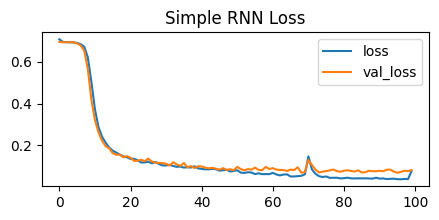

In [67]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Simple RNN Loss')
plt.legend()

Text(0.5, 1.0, 'Simple RNN Accuracy')

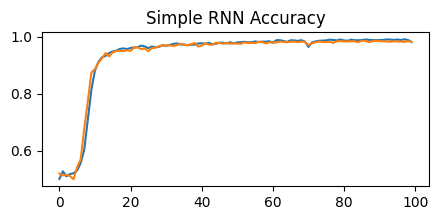

In [68]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Simple RNN Accuracy')

In [69]:
#Now the orig data is a long distance problem
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3) :
    x1 = x[i1]
    x2 = x[i2]
    x3 = x[i3]
    return xor_signs(x1, x2, x3)

for t in range(5000) :
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) #long distance
    Y.append(y)
    
X = np.array(X) # NxT
Y = np.array(Y) # N
N = len(X)
print(X.shape, Y.shape)

(5000, 10) (5000,)


In [70]:
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid') (x)
model = Model(i, x)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(
	loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
	X, Y,
    validation_split=0.5, 
    epochs = 100
)

Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.7159 - accuracy: 0.5236 - val_loss: 0.6944 - val_accuracy: 0.5120
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5456 - val_loss: 0.6929 - val_accuracy: 0.5272
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5568 - val_loss: 0.6916 - val_accuracy: 0.5388
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5700 - val_loss: 0.6761 - val_accuracy: 0.5872
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.6140 - val_loss: 0.6565 - val_accuracy: 0.6232
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6240 - val_loss: 0.6510 - val_accuracy: 0.6288
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6476 - val_loss: 0.6572 - val_accuracy: 0.6236
Epoch 8/100
7

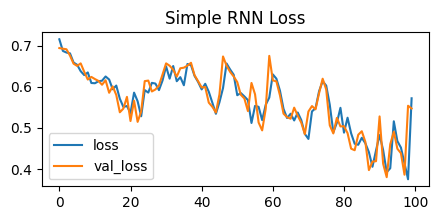

In [72]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Simple RNN Loss')
plt.legend()

Text(0.5, 1.0, 'Simple RNN Accuracy')

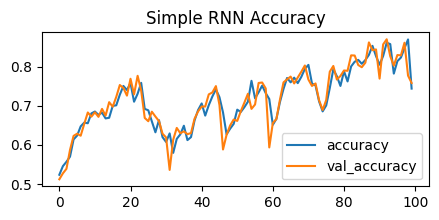

In [74]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Simple RNN Accuracy')

In [75]:
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid') (x)
model = Model(i, x)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(
	loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
	X, Y,
    validation_split=0.5, 
    epochs = 100
)

Epoch 1/100
79/79 [==============================] - 2s 10ms/step - loss: 0.6936 - accuracy: 0.5096 - val_loss: 0.6947 - val_accuracy: 0.4872
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5180 - val_loss: 0.6953 - val_accuracy: 0.4872
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5092 - val_loss: 0.6933 - val_accuracy: 0.4920
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6956 - val_accuracy: 0.4880
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5184 - val_loss: 0.6951 - val_accuracy: 0.4872
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5216 - val_loss: 0.6946 - val_accuracy: 0.4940
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5164 - val_loss: 0.6945 - val_accuracy: 0.4896
Epoch 8/100


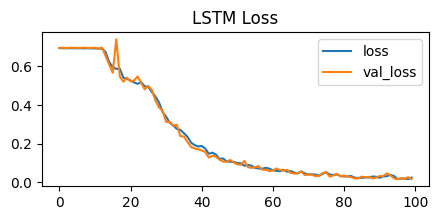

In [78]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM Loss')
plt.legend()

Text(0.5, 1.0, 'LSTM Accuracy')

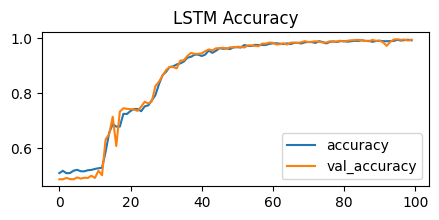

In [79]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('LSTM Accuracy')

In [80]:
#Increasing the time step T, will result in poor convergance 
T = 30
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3) :
    x1 = x[i1]
    x2 = x[i2]
    x3 = x[i3]
    return xor_signs(x1, x2, x3)

for t in range(5000) :
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) #long distance
    Y.append(y)
    
X = np.array(X) # NxT
Y = np.array(Y) # N
N = len(X)
print(X.shape, Y.shape)

(5000, 30) (5000,)


In [81]:
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid') (x)
model = Model(i, x)

model.compile(
	loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
	X, Y,
    validation_split=0.5, 
    epochs = 100
)

Epoch 1/100
79/79 [==============================] - 2s 14ms/step - loss: 0.6967 - accuracy: 0.4804 - val_loss: 0.6931 - val_accuracy: 0.5136
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5112 - val_loss: 0.6948 - val_accuracy: 0.4956
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.5004 - val_loss: 0.6936 - val_accuracy: 0.4976
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4972 - val_loss: 0.6934 - val_accuracy: 0.5016
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.4996
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6935 - val_accuracy: 0.4984
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.4984 - val_loss: 0.6949 - val_accuracy: 0.4992
Epoch 8/100


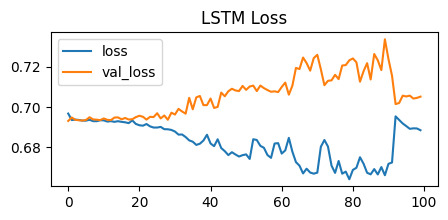

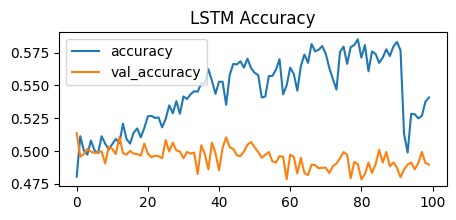

In [82]:
plt.figure()
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('LSTM Accuracy')
plt.show()


Hence LSTM hit a limit to how long it can remember in a sequence. To improve the model performance, add a GlobalMaxPool Layer 

In [84]:
i = Input(shape=(T, D))
x = LSTM(5, return_sequences = True)(i)
x = GlobalMaxPool1D() (x)
x = Dense(1, activation = 'sigmoid') (x)
model = Model(i, x)

model.compile(
	loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

r = model.fit(
	X, Y,
    validation_split=0.5, 
    epochs = 100
)

Epoch 1/100
79/79 [==============================] - 3s 14ms/step - loss: 0.6956 - accuracy: 0.4796 - val_loss: 0.6939 - val_accuracy: 0.4960
Epoch 2/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6944 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.4844
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6935 - val_accuracy: 0.4960
Epoch 4/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5092 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.4988 - val_loss: 0.6936 - val_accuracy: 0.4992
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6936 - val_accuracy: 0.4924
Epoch 7/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5248
Epoch 8/1

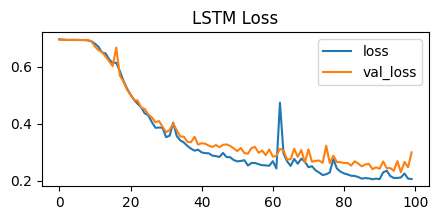

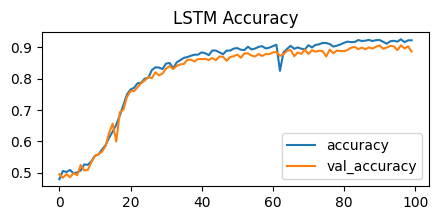

In [85]:
plt.figure()
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('LSTM Accuracy')
plt.show()
